> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \epsilon( v - \alpha u)$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v -u + \mu v - v^3$</center></h3>

With parameters  :
- $D_u = 0.05, \quad D_v=0.00028$.
- $\alpha = 1.0$.
- $\epsilon = 6.45$.
- $\mu = 1.5$.

In [18]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import FitzHugh_Nagumo

from matplotlib import pyplot as plt

In [14]:
print(alpha/Ds[0])
print(epsilon/Ds[0])
print(1/(Ds[1]*100))
print(mu/(Ds[1]*100))
print(Ds[0]/(Ds[1]*100))

20.0
129.0
35.714285714285715
53.57142857142858
1.785714285714286


In [15]:
n = (32, 32)
L = (1.0, 1.0)

c0 = np.random.normal(scale=0.01, size=(2, n[0], n[1]))

Ds = np.array([0.05, 0.00028])
alpha = 1.0#6.26681#1.0
epsilon = 6.45#6.26681#6.45#6.0
mu = 1.5#2.52348#1.5#1.4

f_args = (alpha, epsilon, mu)
t = np.linspace(0, 100, 256)

dt = 0.001

sol = integrate(c0, t, dt, n, L, Ds, FitzHugh_Nagumo, f_args)


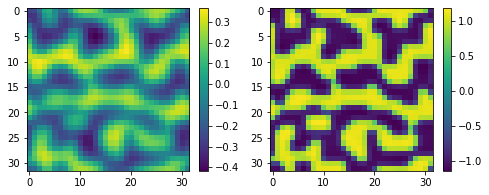

In [16]:
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, -1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, -1])
plt.colorbar(shrink=.75)

In [4]:
with open('../turing_FitzHugh_Nagumo.npy', 'wb') as f:
    np.save(f, sol)
    
with open('../turing_t_FitzHugh_Nagumo.npy', 'wb') as f:
    np.save(f, t)

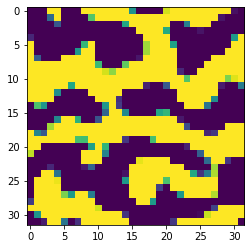

In [17]:
from matplotlib.animation import FuncAnimation


fig = plt.figure()

im = im=plt.imshow(sol[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(sol[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=sol[0, :,:,i] 
    im.set_array(sol[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=100, blit=True)


anim.save('turring_FitzHugh_Nagumo.gif', writer='imagemagick')